In [1]:
import GI_parser as GIP
import numpy as np
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.mlab as mlab
from matplotlib.ticker import NullFormatter
import glob
import time
import math

In [2]:
def mean2(x):
    y = np.sum(x) / np.size(x);
    return y

def corr2(a,b):
    a = a - mean2(a)
    b = b - mean2(b)

    r = (a*b).sum() / math.sqrt((a*a).sum() * (b*b).sum());
    return r

In [3]:
framebase=GIP.FrameBase("frames_B3_wire_1_W0028.txt")

Beam1  (110, 110)  Beam2  (110, 110)
0.6642138315204086


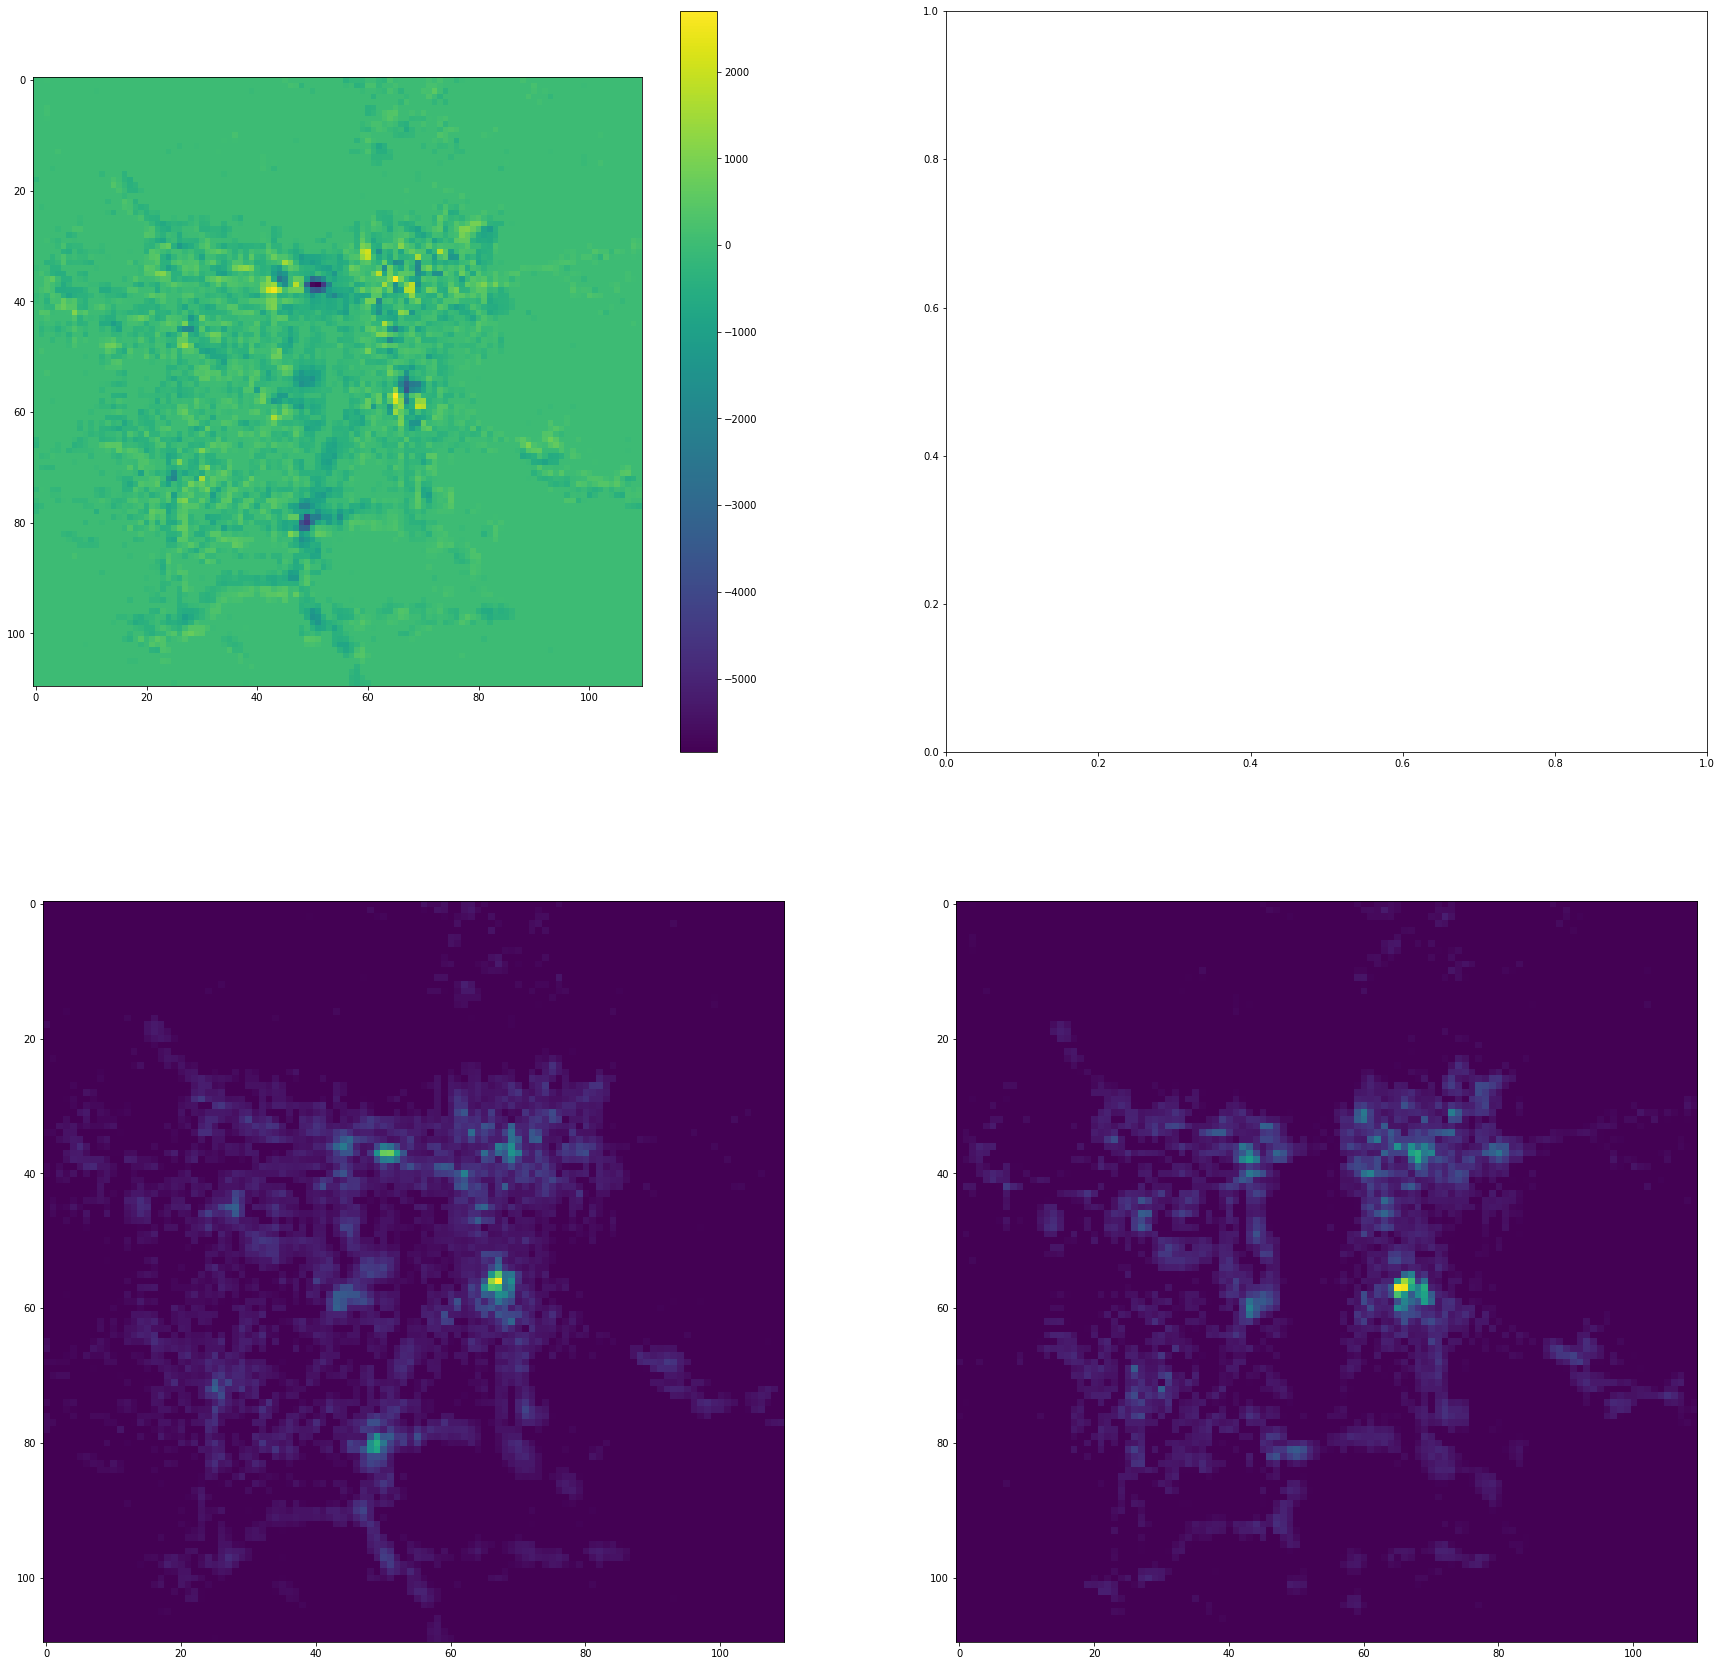

In [4]:
#Examine the frame

s1x1=120
s1x2=230

s1y1=140
s1y2=250

s2x1=28
s2x2=138

s2y1=21
s2y2=131



frame_index=5000


beam1=framebase[frame_index].data[s1x1:s1x2,s1y1:s1y2]
beam2=framebase[frame_index].data[s2x1:s2x2,s2y1:s2y2]



beam1_cp=np.copy(beam1)
beam2_cp=np.copy(beam2)

# for i in range(beam1_cp.shape[0]):
#     for j in range(beam1_cp.shape[0]):
#         if beam1_cp[i,j]<1100:
#             beam1_cp[i,j]=0
#         if beam2_cp[i,j]<1100:
#             beam2_cp[i,j]=0
            
          
overlap=beam1_cp-beam2_cp

fig, ax = plt.subplots(ncols=2,nrows=2, figsize=(30, 30))

_=ax[0,0].imshow(overlap) 
fig.colorbar(_,ax=ax[0,0])
ax[1,1].imshow(beam1)
ax[1,0].imshow(beam2)

print("Beam1 ",beam1.shape," Beam2 ",beam2.shape)
print(corr2(framebase[frame_index].data[s1x1:s1x2,s1y1:s1y2],framebase[frame_index].data[s2x1:s2x2,s2y1:s2y2]))

In [7]:
#This cell evaluates how shifting one image against the other affects correlations


correlations=np.ndarray(shape=(11,11))


ct=0
for i in range(-5,6):
    for j in range(-5,6):


        s1x1=120+i
        s1x2=230+i

        s1y1=140+j
        s1y2=250+j

        s2x1=28
        s2x2=138

        s2y1=21
        s2y2=131


        corr_coefficients=[]
        
        for frame_index in range(1,10000):
            corr_coefficients.append(corr2(framebase[frame_index].data[s1x1:s1x2,s1y1:s1y2],framebase[frame_index].data[s2x1:s2x2,s2y1:s2y2]))
        correlations[i+5][j+5]=np.mean(corr_coefficients)
        print("i=",i,"j=",j,"corr=",np.mean(corr_coefficients))
        ct+=1
        
        

print("Max correlations at i=",np.unravel_index(correlations.argmax(),correlations.shape)[0]-5," j=",np.unravel_index(correlations.argmax(),correlations.shape)[1]-5)

s1x1=120+np.unravel_index(correlations.argmax(),correlations.shape)[0]-5
s1x2=230+np.unravel_index(correlations.argmax(),correlations.shape)[0]-5


s1y1=140+np.unravel_index(correlations.argmax(),correlations.shape)[1]-5
s1y2=250+np.unravel_index(correlations.argmax(),correlations.shape)[1]-5


print("Beam1: x=[{}:{}], y=[{}:{}]".format( s1x1, s1x2 ,s1y1,s1y2 ))


i= -5 j= -5 corr= 0.2593301361889764
i= -5 j= -4 corr= 0.2734049068108168
i= -5 j= -3 corr= 0.2886713479917943
i= -5 j= -2 corr= 0.2971482110665735
i= -5 j= -1 corr= 0.30790836126188564
i= -5 j= 0 corr= 0.31497147032648504
i= -5 j= 1 corr= 0.31189241937671897
i= -5 j= 2 corr= 0.2996761425615892
i= -5 j= 3 corr= 0.28318363436382
i= -5 j= 4 corr= 0.26357993099731225
i= -5 j= 5 corr= 0.25393908642106816
i= -4 j= -5 corr= 0.27593107621030555
i= -4 j= -4 corr= 0.294506269869457
i= -4 j= -3 corr= 0.3150524211494791
i= -4 j= -2 corr= 0.3287074669132773
i= -4 j= -1 corr= 0.3420047938395094
i= -4 j= 0 corr= 0.3477814684636285
i= -4 j= 1 corr= 0.34024880328306184
i= -4 j= 2 corr= 0.3187181857816206
i= -4 j= 3 corr= 0.29485271810102814
i= -4 j= 4 corr= 0.2721628483082121
i= -4 j= 5 corr= 0.2592464595579877
i= -3 j= -5 corr= 0.2895606099475644
i= -3 j= -4 corr= 0.3161280989607049
i= -3 j= -3 corr= 0.346515218012761
i= -3 j= -2 corr= 0.3738433302380438
i= -3 j= -1 corr= 0.3954951648419485
i= -3 j= 

In [8]:
#GHOST IMAGING WOOOOOO



#Term 1, Term 2 and Term 3 refer to 3 summation terms in formula (3) in this paper: https://www.osapublishing.org/optica/viewmedia.cfm?uri=optica-5-4-374&seq=0


ghost=np.ndarray(shape=(110,110))

s1x1=121
s1x2=231

s1y1=140
s1y2=250

s2x1=28
s2x2=138

s2y1=21
s2y2=131

nframes=10000

#The first 2 for loops go pixel by pixel

for i in range(beam1.shape[0]):
    for j in range(beam1.shape[1]):
        term1=0
        term2=0
        term3=0
        #This loop goes over 10000 frames
        for frame_ct in range(nframes):
            
            #This is I_i
            beam1=framebase[frame_ct].data[s1x1:s1x2,s1y1:s1y2]
            
            #This is S_i
            beam2_bucket=np.sum(framebase[frame_ct].data[s2x1:s2x2,s2y1:s2y2])
            #Where i is the index of a frame (frame_ct in code)
            #Note that this 'i' is not the same as  the 'i' in the first for-loop above. This 'i' is the x coordinate of the image
            
            
            
            
            term1+=beam2_bucket*beam1[i,j]
            term2+=beam2_bucket
            term3+=beam1[i,j]
        
        
        #After the three summations have been assembled, put them into formula (3) to produce the ghost image at the [i,j] coordinate 
        ghost[i,j]=term1/nframes-(term2*term3)/ (nframes ** 2)
    print ("i=",i,"/110")


i= 0 /110
i= 1 /110
i= 2 /110


KeyboardInterrupt: 

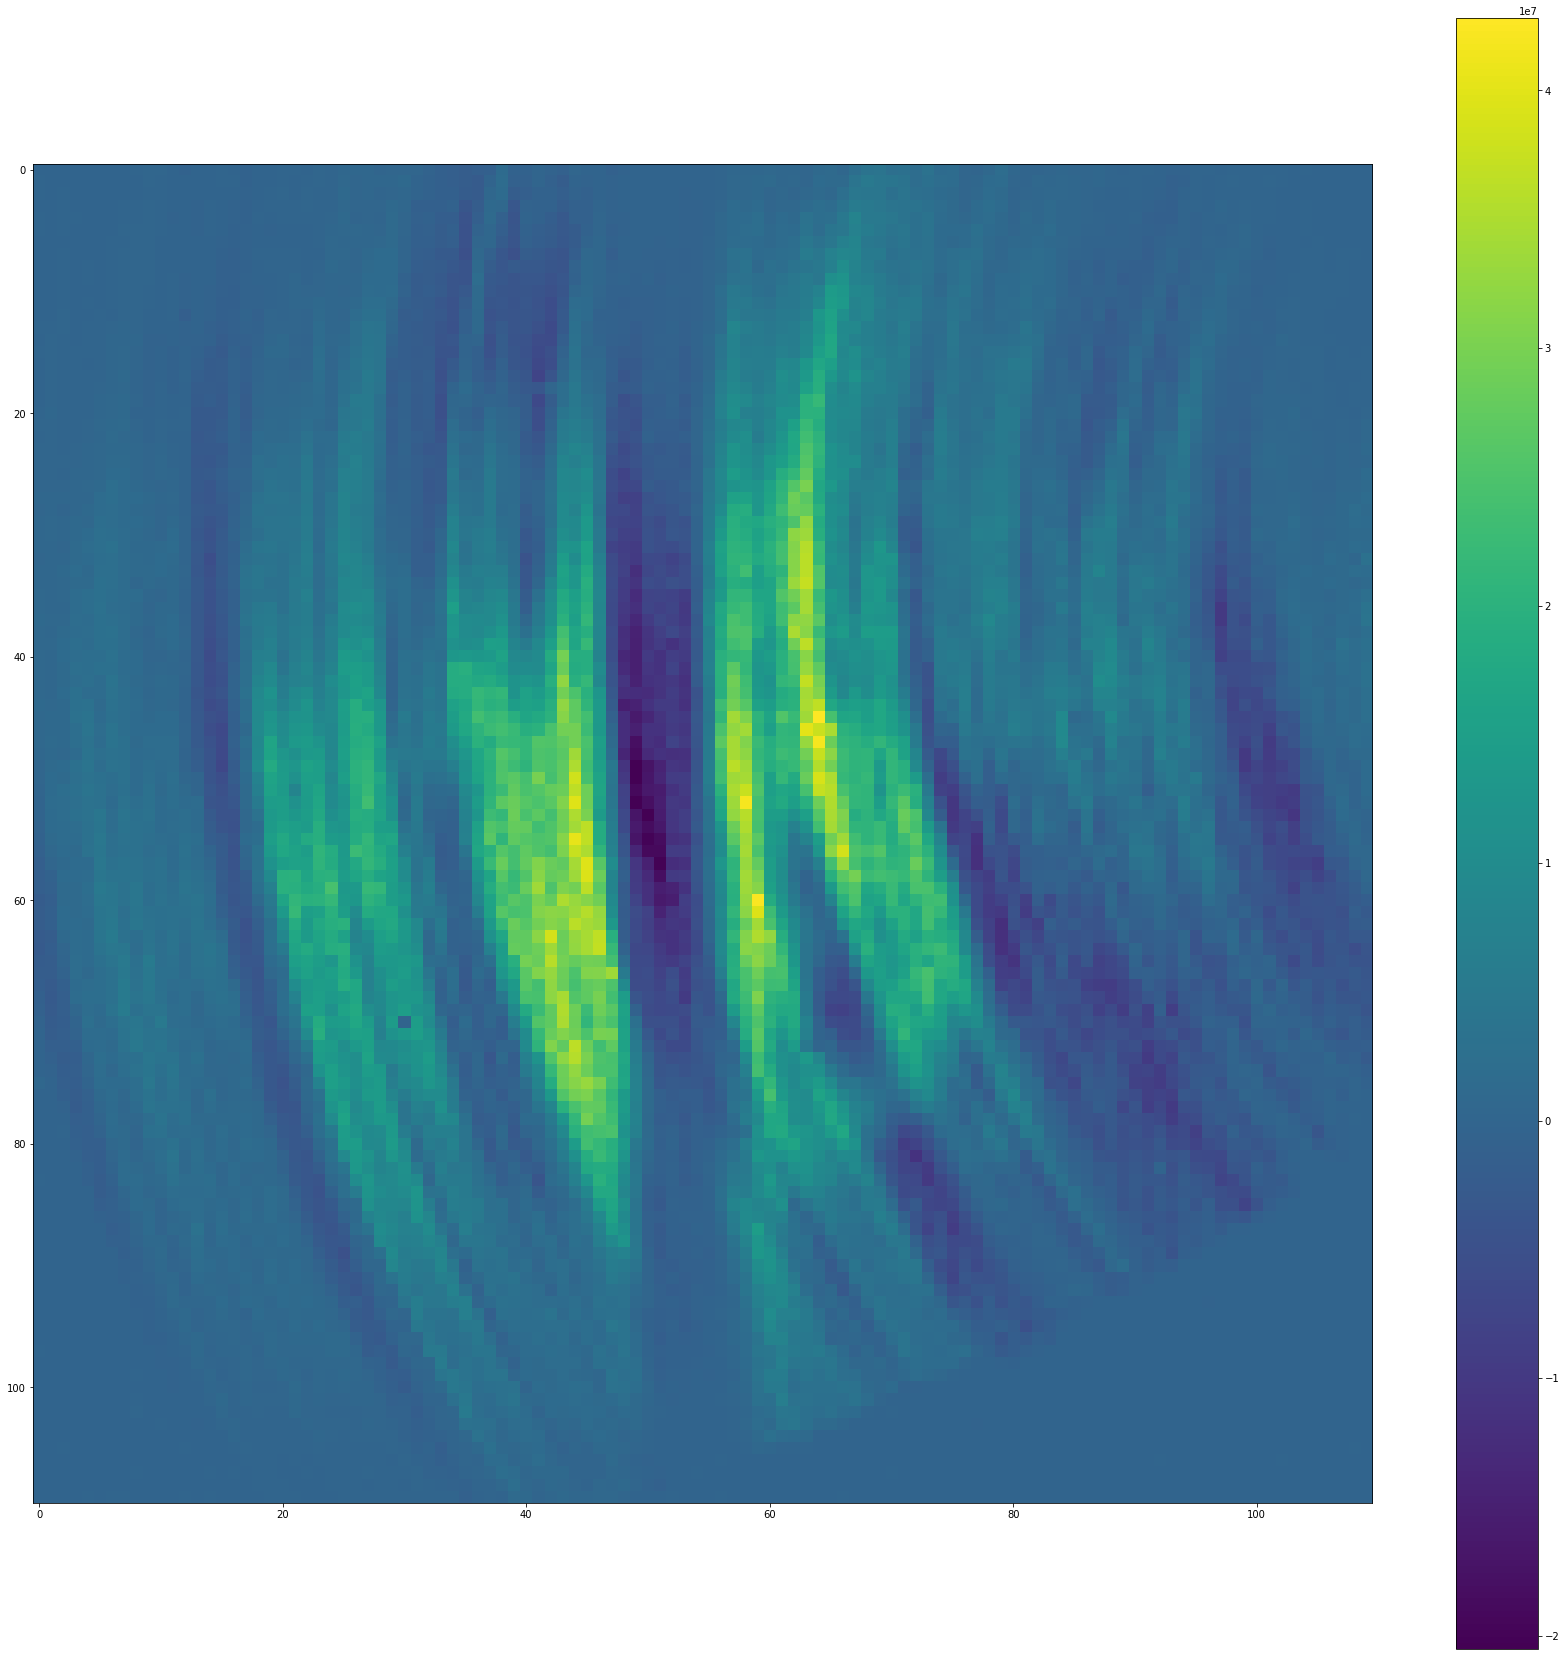

In [21]:
#Show the ghost
fig, ax = plt.subplots(ncols=1,nrows=1, figsize=(30, 30))
_=ax.imshow(ghost)
fig.colorbar(_)


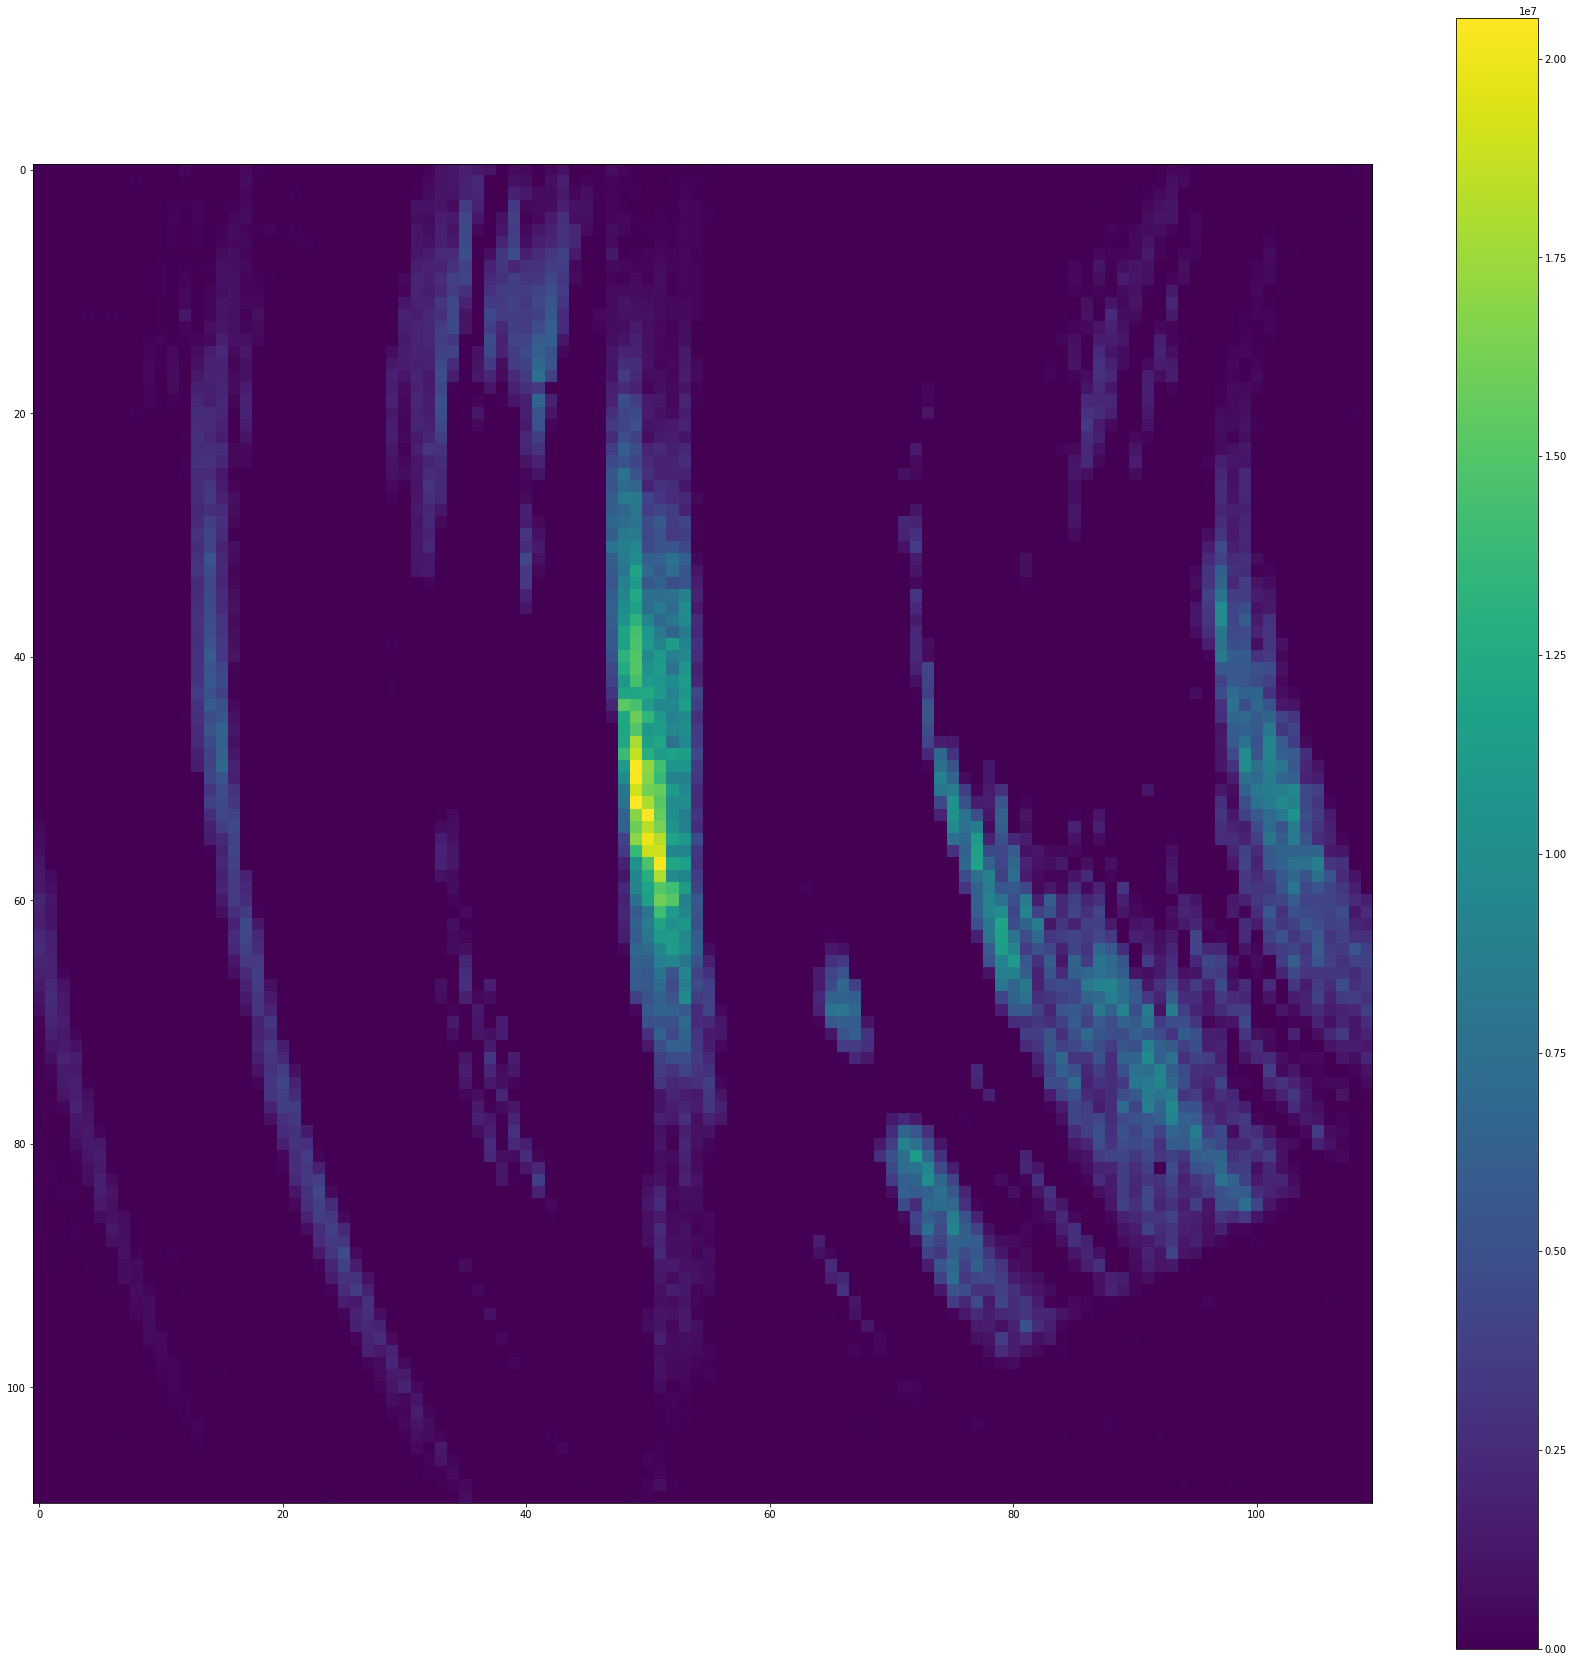

In [33]:
#Invert negative values and remove positive ones

#This is an attempt of processing the ghost image and its very bad

ghost_test=np.ndarray(shape=(110,110))
for i in range (ghost.shape[0]):
    for j in range(ghost.shape[1]):
        if ghost[i,j] < 0 :
            ghost_test[i,j]=ghost[i,j]*-1
        else:
            ghost_test[i,j]=0
            
            

fig, ax = plt.subplots(ncols=1,nrows=1, figsize=(30, 30))
_=ax.imshow(ghost_test)
fig.colorbar(_)